# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "weatherpy_cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [5]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Create empty lists to store the data for each field
city_names = []
countries = []
lat_ls = []
lng_ls = []
temp_ls = []
humidity_ls = []
cloudiness_ls = []
wind_speeds = []
dates = []


In [6]:
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create Counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}&appid={weather_api_key}&units={units}&q={city}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
 

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]['lat']
        city_lng = city_weather["coord"]['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pangody
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | sao vicente
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | victoria point
Processing Record 9 of Set 1 | el calafate
Processing Record 10 of Set 1 | san patricio
Processing Record 11 of Set 1 | walvis bay
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | ambon
Processing Record 14 of Set 1 | sao jose da coroa grande
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | howard springs
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | ola
Processing Record 20 of Set 1 | kodinsk
Processing Record 21 of Set 1 | kapuskasing
Processing Record 22 of Set 

Processing Record 44 of Set 4 | crane
Processing Record 45 of Set 4 | bargara
City not found. Skipping...
Processing Record 46 of Set 4 | harstad
Processing Record 47 of Set 4 | labrador city
Processing Record 48 of Set 4 | new plymouth
Processing Record 49 of Set 4 | askiz
Processing Record 0 of Set 5 | 'ohonua
City not found. Skipping...
Processing Record 1 of Set 5 | pipar
Processing Record 2 of Set 5 | toga village
City not found. Skipping...
Processing Record 3 of Set 5 | nar'yan-mar
Processing Record 4 of Set 5 | argo
Processing Record 5 of Set 5 | inarajan village
Processing Record 6 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 7 of Set 5 | talnakh
Processing Record 8 of Set 5 | khovd
Processing Record 9 of Set 5 | guerrero negro
Processing Record 10 of Set 5 | arkalyk
Processing Record 11 of Set 5 | ubari
Processing Record 12 of Set 5 | vilyuysk
Processing Record 13 of Set 5 | la passe
Processing Record 14 of Set 5 | hsinchu
Processing Record 15 of Set 5 

Processing Record 35 of Set 8 | callao
Processing Record 36 of Set 8 | christchurch
Processing Record 37 of Set 8 | tidjikja
Processing Record 38 of Set 8 | nyurba
Processing Record 39 of Set 8 | yanchep
Processing Record 40 of Set 8 | wynyard
Processing Record 41 of Set 8 | kapenguria
Processing Record 42 of Set 8 | pakxan
Processing Record 43 of Set 8 | as sulayyil
Processing Record 44 of Set 8 | san luis de la loma
Processing Record 45 of Set 8 | beyneu
Processing Record 46 of Set 8 | pierre
Processing Record 47 of Set 8 | mata-utu
Processing Record 48 of Set 8 | tacuarembo
Processing Record 49 of Set 8 | sorong
Processing Record 0 of Set 9 | baikonur
Processing Record 1 of Set 9 | santana
Processing Record 2 of Set 9 | carolina beach
Processing Record 3 of Set 9 | kirando
Processing Record 4 of Set 9 | wurtulla
Processing Record 5 of Set 9 | chongoyape
Processing Record 6 of Set 9 | thayetmyo
Processing Record 7 of Set 9 | korla
Processing Record 8 of Set 9 | severo-yeniseyskiy
Pro

City not found. Skipping...
Processing Record 25 of Set 12 | outjo
Processing Record 26 of Set 12 | al hazm
Processing Record 27 of Set 12 | genhe
Processing Record 28 of Set 12 | egersund
Processing Record 29 of Set 12 | paita
Processing Record 30 of Set 12 | kibre mengist
Processing Record 31 of Set 12 | kavaratti
Processing Record 32 of Set 12 | mikashevichy
Processing Record 33 of Set 12 | trincomalee
Processing Record 34 of Set 12 | pont-l'abbe
City not found. Skipping...
Processing Record 35 of Set 12 | brundall
Processing Record 36 of Set 12 | masaka
Processing Record 37 of Set 12 | antofagasta
Processing Record 38 of Set 12 | bantay
Processing Record 39 of Set 12 | khawr fakkan
Processing Record 40 of Set 12 | forked river
Processing Record 41 of Set 12 | arraial do cabo
Processing Record 42 of Set 12 | felidhoo
City not found. Skipping...
Processing Record 43 of Set 12 | saint-joseph
Processing Record 44 of Set 12 | wellington point
Processing Record 45 of Set 12 | aral
Proces

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pangody,65.8500,74.4859,-9.64,92,100,5.21,RU,1681843455
1,kodiak,57.7900,-152.4072,1.73,48,0,5.66,US,1681843455
2,new norfolk,-42.7826,147.0587,12.72,82,100,0.45,AU,1681843455
3,stanley,54.8680,-1.6985,8.49,81,0,4.63,GB,1681843321
4,sao vicente,-23.9631,-46.3919,27.75,60,0,2.24,BR,1681843456


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pangody,65.8500,74.4859,-9.64,92,100,5.21,RU,1681843455
1,kodiak,57.7900,-152.4072,1.73,48,0,5.66,US,1681843455
2,new norfolk,-42.7826,147.0587,12.72,82,100,0.45,AU,1681843455
3,stanley,54.8680,-1.6985,8.49,81,0,4.63,GB,1681843321
4,sao vicente,-23.9631,-46.3919,27.75,60,0,2.24,BR,1681843456


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

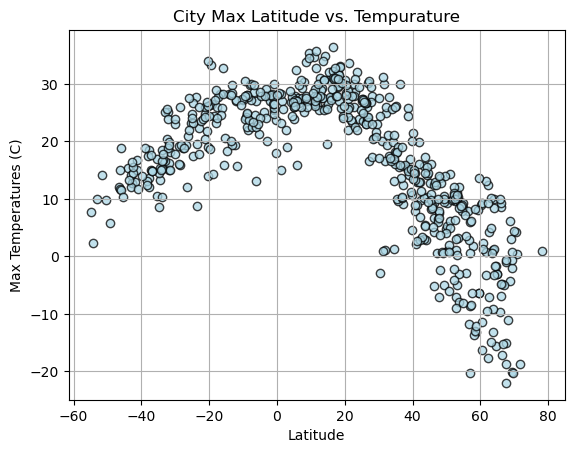

In [19]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", facecolor = "lightblue", edgecolor = "black", alpha=0.75)

# Incorporate the other graph properties

plt.title("City Max Latitude vs. Tempurature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperatures (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

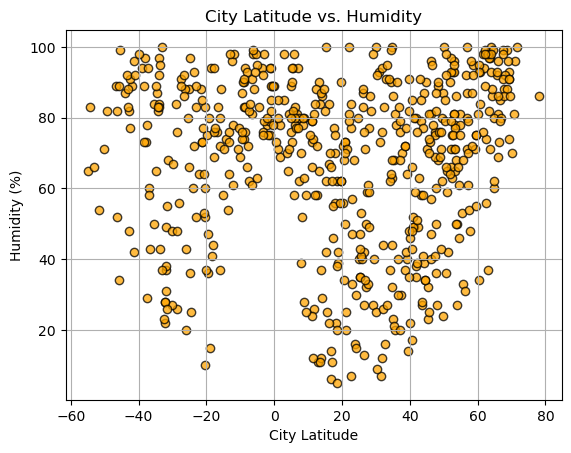

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", color = "orange", edgecolor = "black", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)



# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

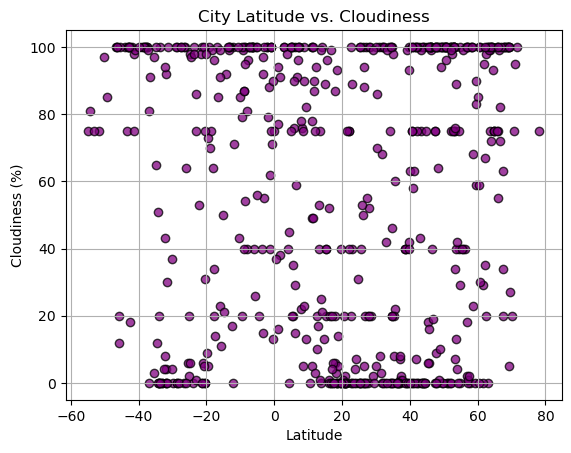

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", color = "purple", edgecolor = "black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

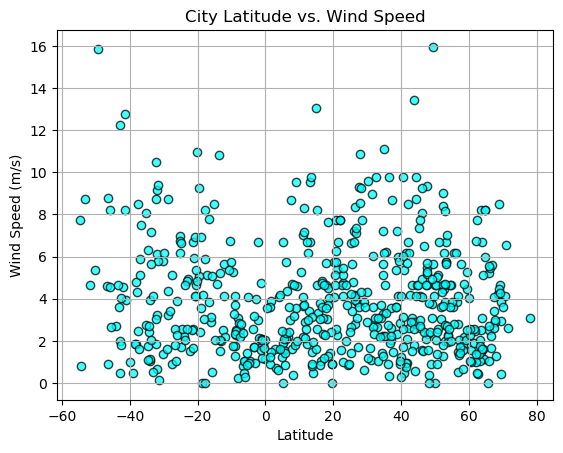

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", color = "aqua", edgecolor = "black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def lineregress_plot():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regression = x_value * slope + intercept
    line_eq_coor = ( xc, yc)

    line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
    plt.scatter(x_value, y_value, marker='o', color='yellow', edgecolors='black')
    plt.plot(x_value, regression, color='red', linewidth=3)
    plt.annotate(line_eq, line_eq_coor, fontsize=16, color="red")
    plt.grid(True)
    print(f"The r-value is: {rvalue}")

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

n_hemisphere_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
n_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pangody,65.8500,74.4859,-9.64,92,100,5.21,RU,1681843455
1,kodiak,57.7900,-152.4072,1.73,48,0,5.66,US,1681843455
3,stanley,54.8680,-1.6985,8.49,81,0,4.63,GB,1681843321
5,iqaluit,63.7506,-68.5145,-13.15,71,75,8.23,CA,1681843456
8,san patricio,28.0170,-97.5169,27.92,77,52,10.86,US,1681843457


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
s_hemisphere_df = city_data_df[(city_data_df["Lat"] < 0)]
s_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,12.72,82,100,0.45,AU,1681843455
4,sao vicente,-23.9631,-46.3919,27.75,60,0,2.24,BR,1681843456
6,victoria point,-27.5833,153.3000,18.84,91,100,0.89,AU,1681843456
7,el calafate,-50.3408,-72.2768,9.73,71,97,5.34,AR,1681843327
9,walvis bay,-22.9575,14.5053,22.37,52,86,4.95,NaN,1681843457


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8566286308775074


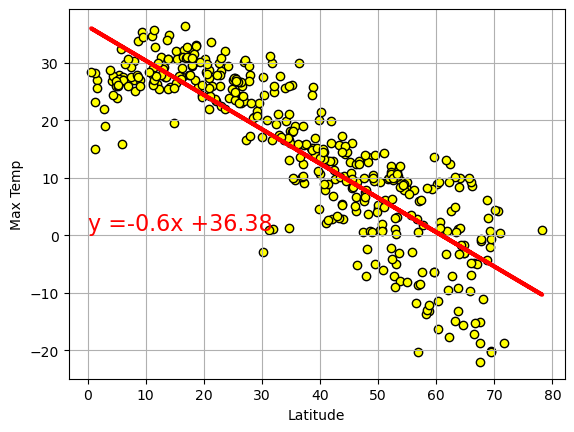

In [31]:
# Linear regression on Northern Hemisphere
x_value = n_hemisphere_df["Lat"]
y_value = n_hemisphere_df["Max Temp"]
xc = 0
yc = 1

lineregress_plot()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.749814664112022


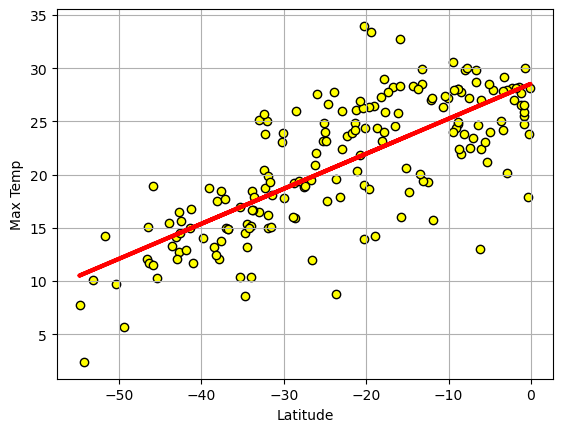

In [32]:
# Linear regression on Southern Hemisphere
x_value = s_hemisphere_df["Lat"]
y_value = s_hemisphere_df["Max Temp"]
xc = -30
yc = 52

lineregress_plot()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** 

There is a fairly strong negative correlation between temperature and latitude with a correlation coefficient of -0.8566286308775074 on Northern Hemisphere.
There is a relatively strong positive correlation between temperature and latitude with a correlation coefficient of 0.749814664112022 on Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2561860526503448


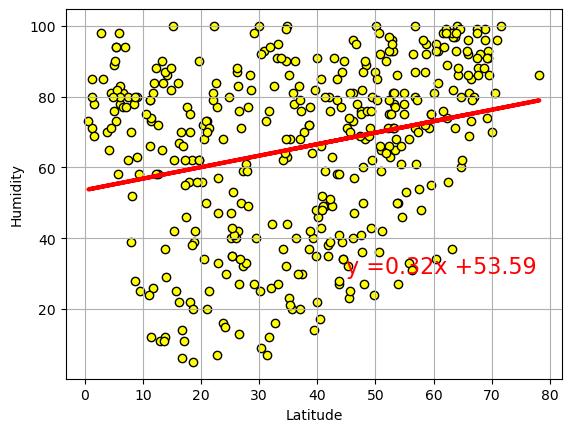

In [33]:
# Northern Hemisphere
x_value = n_hemisphere_df["Lat"]
y_value = n_hemisphere_df["Humidity"]
xc = 45
yc = 30

lineregress_plot()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.19685763267727127


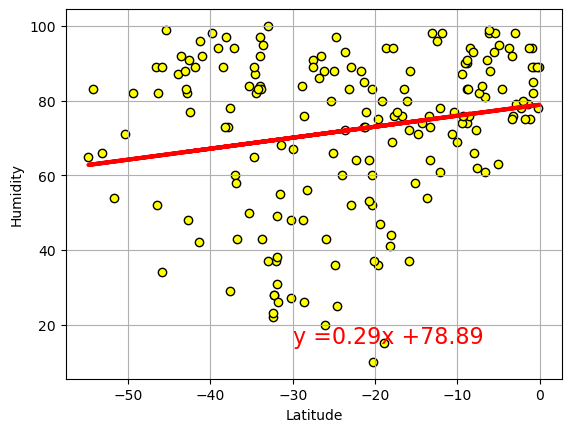

In [34]:
x_value = s_hemisphere_df["Lat"]
y_value = s_hemisphere_df["Humidity"]
xc = -30
yc = 15

lineregress_plot()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** 

There is a weak positive correlation between humidity and latitude with a correlation coefficient of 0.2561860526503448 on Northern Hemisphere.
There is a relatively weak positive correlation correlation between humidity and latitude with a correlation coefficient of 0.19685763267727127 on Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2118598612091229


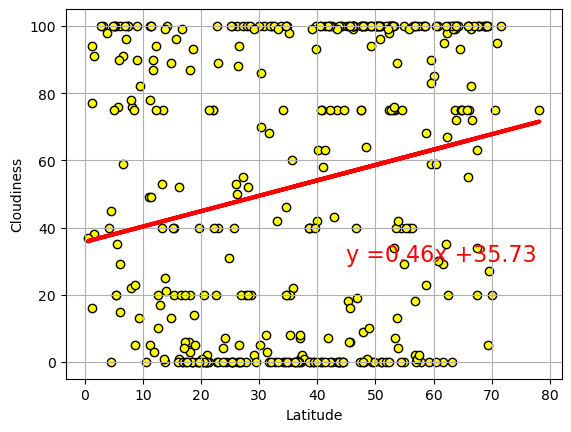

In [35]:
#Northern Hemi
x_value = n_hemisphere_df["Lat"]
y_value = n_hemisphere_df["Cloudiness"]
xc = 45
yc = 30

lineregress_plot()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.2118598612091229


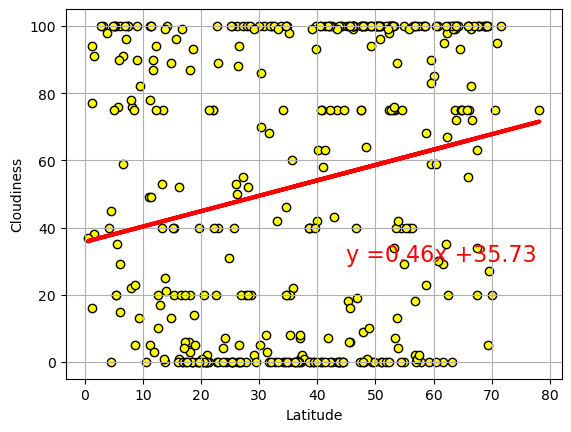

In [36]:
# Southern Hemisphere
x_value = n_hemisphere_df["Lat"]
y_value = n_hemisphere_df["Cloudiness"]
xc = 45
yc = 30

lineregress_plot()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** 

There is a weak positive correlation between cloudiness and latitude with a correlation coefficient of 0.2118598612091229 on Northern Hemisphere.
There is a relatively weak positive correlation between cloudiness and latitude with a correlation coefficient of 0.2118598612091229 on Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.006347667996154554


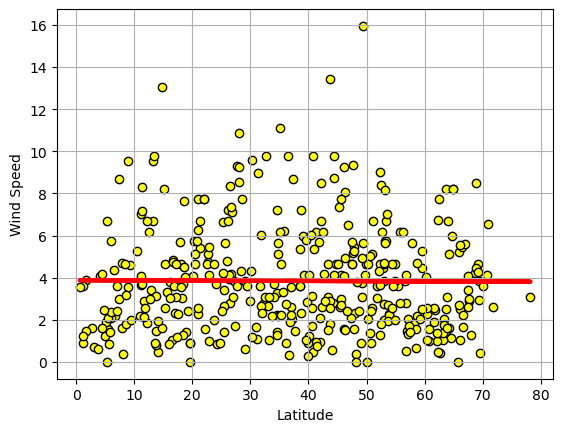

In [37]:
# Northern Hemisphere
x_value = n_hemisphere_df["Lat"]
y_value = n_hemisphere_df["Wind Speed"]
xc = 45
yc = 30

lineregress_plot()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.31263905240483214


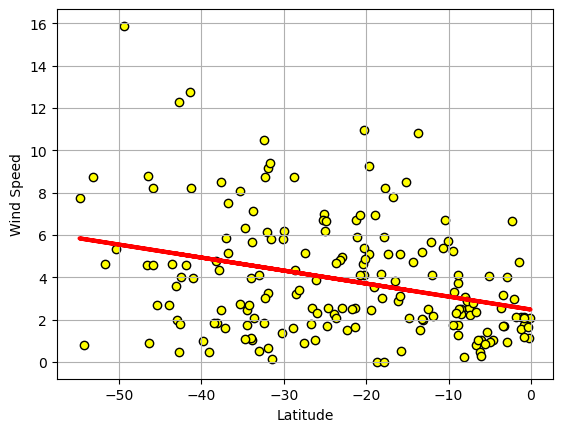

In [38]:
# Southern Hemisphere
x_value= s_hemisphere_df["Lat"]
y_value = s_hemisphere_df["Wind Speed"]
xc = -45
yc = 30

lineregress_plot()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** 

There is a negligible to almost no correlation between wind speed and latitude with a correlation coefficient of -0.006347667996154554 on Northern Hemisphere.
There is a strong negative correlation between wind speed and latitude with a correlation coefficient of -0.-0.31263905240483214 on Southern Hemisphere.